# Machine learning concepts with Scikit-learn

<a rel="license" href="https://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="width=50" src="https://licensebuttons.net/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

**Author**: Antonia Mey    
**Email**: antonia.mey@ed.ac.uk

Content is partially adapted from the [Software Carpentries Machine learning lesson](https://carpentries-incubator.github.io/machine-learning-novice-sklearn/index.html) and [here](https://github.com/christianversloot/machine-learning-articles/blob/main/performing-dbscan-clustering-with-python-and-scikit-learn.md).

## 1. K-means Clustering

K-means is a simple clustering algorithm that tries to identify the centre of each cluster. It does this by searching for a point which minimises the distance between the centre and all the points in the cluster. The algorithm needs to be told **how many clusters** to look for, but a common technique is to try different numbers of clusters and combine it with other tests to decide on the number.

To perform a [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering with Scikit-learn, we first need to import the `sklearn.cluster` module.

In [110]:

import sklearn.cluster as skl_cluster
import numpy as np

### 1.1. Creating the data

For this example, we will use scikit-learn’s built in random data blob generator instead of using an external dataset. For this we will also need the `sklearn.datasets.samples_generator` module.



In [111]:
import sklearn.datasets as skl_datasets
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set(font_scale=1.5)
sbn.set_style("white")
sbn.set_style("ticks")


Now let’s create some random blobs using the `make_blobs` function. The `n_samples` argument sets how many points we want to use in all of our blobs. `cluster_std` sets the standard deviation of the points, the smaller this value the closer together they will be. `centers` sets the desired number of clusters. `random_state` is the initial state of the random number generator, by specifying its value we will get the same results every time we run the program. If we do not specify a random state, then we will get different points every time we run. This function returns two things: an array of data points and a list of which cluster each point belongs to.



In [112]:

data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=0.75, centers=4, random_state=1)


### 1.2. Plotting and Clustering the data

We have now created the data, let's have a look at what `make_blobs` gave us!

(400, 2)


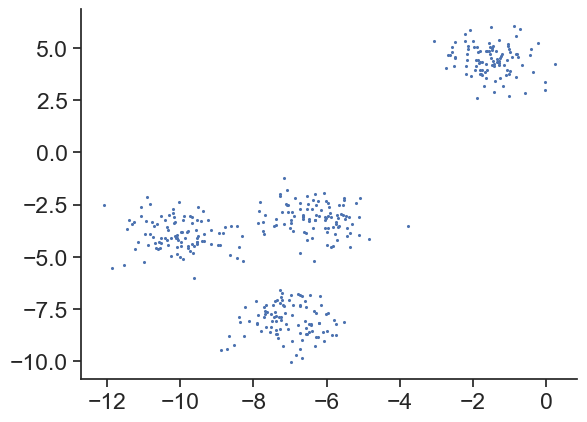

In [113]:

print(np.shape(data))
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0)
sbn.despine()

Let's identify the clusters using K-means. First, we need to initialise the `KMeans` module and tell it how many clusters to look for. Next, we supply it some data via the `fit` function. Finally, we run the predict function to find the clusters.

In [114]:
# 1. Initialise Kmeans
Kmean = skl_cluster.KMeans(n_clusters=4)
# 2. Fit the data
Kmean.fit(data)
# 3. Predict the clusters
clusters = Kmean.predict(data)

In [115]:
Kmean?

In [116]:
colours = []
for c in clusters:
    
    colours.append(sbn.color_palette()[c])

The data can now be plotted to show all the points we randomly generated. To make it clearer which cluster points have been classified to, we can set the colours (the `c` parameter) to use the clusters list that was returned by the predict function. The K-means algorithm also lets us know where the centre of each cluster is located. Cluster centres are stored as a list called `cluster_centers_` inside the `Kmean` object. Let’s go ahead and plot the points from the clusters, colouring them by the output from the K-means algorithm, and also plot the centres of each cluster as a red triangle.

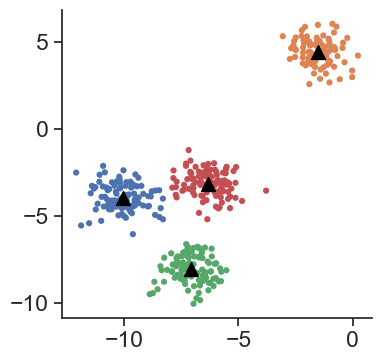

In [117]:
plt.figure(figsize=(4,4))
plt.scatter(data[:, 0], data[:, 1], s=20, linewidth=0, c=colours)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='black', marker='^')
sbn.despine()

## 1.3 How k-means works

Let's create an even simpler dataset with just 2 clusters:

In [118]:
data, cluster_id = skl_datasets.make_blobs(n_samples=50, cluster_std=0.95, centers=2, random_state=6)

(50, 2)


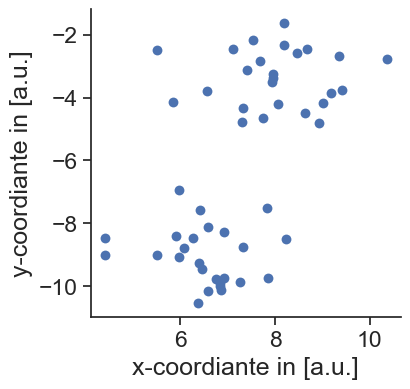

In [119]:
print(np.shape(data))

fig = plt.figure(figsize= (4,4))
plt.scatter(data[:, 0], data[:, 1], s=50, linewidth=0)
plt.xlabel('x-coordiante in [a.u.]')
plt.ylabel('y-coordiante in [a.u.]')
sbn.despine()

In [120]:
# 1st step is to initialise the two cluster centres randomly:
import random 
c_centers = np.random.choice(np.arange(len(data)), replace = False, size=2)
print(c_centers)
center_1_pos =  np.array([data[c_centers[0], 0],data[c_centers[0], 1]])
center_2_pos = np.array([data[c_centers[1], 0],data[c_centers[1], 1]])

[21  3]


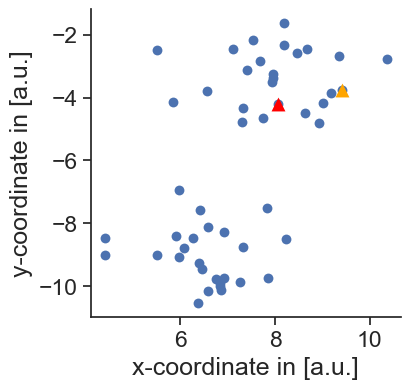

In [128]:
# plotting initial cluster centers chosen randomly

fig = plt.figure(figsize= (4,4))
plt.scatter(data[:, 0], data[:, 1], s=50, linewidth=0)
plt.scatter(data[c_centers[0], 0], data[c_centers[0], 1],marker='^', s=100, linewidth=0, color='red')
plt.scatter(data[c_centers[1], 0], data[c_centers[1], 1],marker='^', s=100, linewidth=0, color='orange')
plt.xlabel('x-coordinate in [a.u.]')
plt.ylabel('y-coordinate in [a.u.]')
sbn.despine()

In [130]:
# loop over data
clusters = []
for point in data:
    dist = []
    dist.append(np.linalg.norm(point-center_1_pos))
    dist.append(np.linalg.norm(point-center_2_pos))
    clusters.append(np.argmin(dist))
clusters = np.array(clusters)
cluster_0 = np.where(clusters == 0)[0]
cluster_1 = np.where(clusters == 1)[0]
new_center_1_pos = np.mean(data[cluster_0],axis=0)
new_center_2_pos = np.mean(data[cluster_1],axis=0)
    


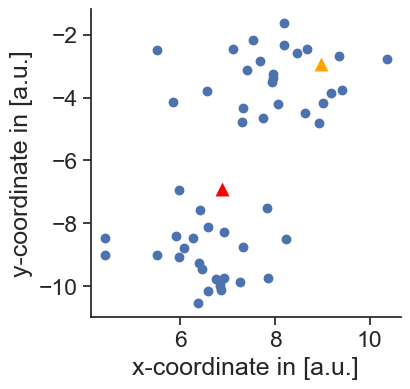

In [131]:
# plotting initial cluster centers chosen randomly
fig = plt.figure(figsize= (4,4))
plt.scatter(data[:, 0], data[:, 1], s=50, linewidth=0)
plt.scatter(new_center_1_pos[0],new_center_1_pos[1], marker='^', s=100, linewidth=0, color='red')
plt.scatter(new_center_2_pos[0],new_center_2_pos[1], marker='^', s=100, linewidth=0, color='orange')
plt.xlabel('x-coordinate in [a.u.]')
plt.ylabel('y-coordinate in [a.u.]')
sbn.despine()

In [39]:
# loop over data
clusters = []
for point in data:
    dist = []
    dist.append(np.linalg.norm(point-new_center_1_pos))
    dist.append(np.linalg.norm(point-new_center_2_pos))
    clusters.append(np.argmin(dist))
clusters = np.array(clusters)
cluster_0 = np.where(clusters == 0)[0]
cluster_1 = np.where(clusters == 1)[0]
new_center_1_pos = np.mean(data[cluster_0],axis=0)
new_center_2_pos = np.mean(data[cluster_1],axis=0)
    

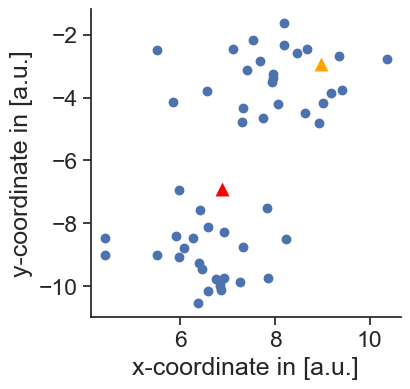

In [132]:
# plotting initial cluster centers chosen randomly
fig = plt.figure(figsize= (4,4))
plt.scatter(data[:, 0], data[:, 1], s=50, linewidth=0)
plt.scatter(new_center_1_pos[0],new_center_1_pos[1],marker='^', s=100, linewidth=0, color='red')
plt.scatter(new_center_2_pos[0],new_center_2_pos[1],marker='^', s=100, linewidth=0, color='orange')
plt.xlabel('x-coordinate in [a.u.]')
plt.ylabel('y-coordinate in [a.u.]')
sbn.despine()

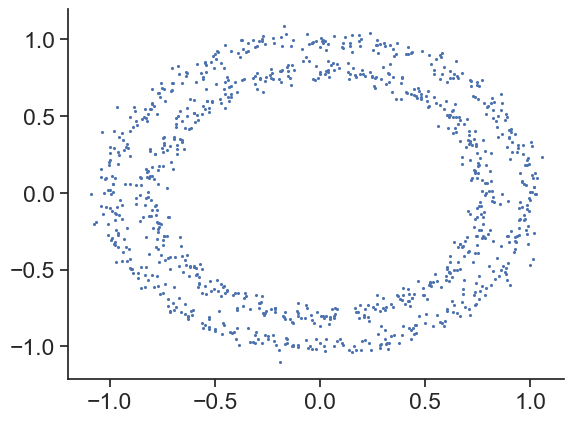

In [63]:
## All datasets:

data, cluster_id = skl_datasets.make_circles(n_samples=1000, noise=0.04)
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0)
sbn.despine()

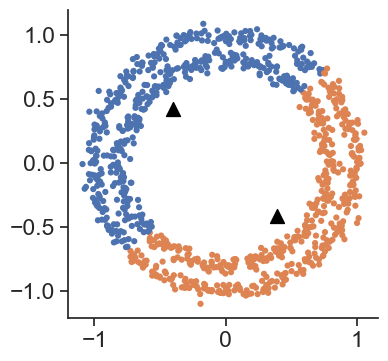

In [65]:
# 1. Initialise Kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
# 2. Fit the data
Kmean.fit(data)
# 3. Predict the clusters
clusters = Kmean.predict(data)

colours = []
for c in clusters:
    
    colours.append(sbn.color_palette()[c])

plt.figure(figsize=(4,4))
plt.scatter(data[:, 0], data[:, 1], s=20, linewidth=0, c=colours)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='black', marker='^')
sbn.despine()

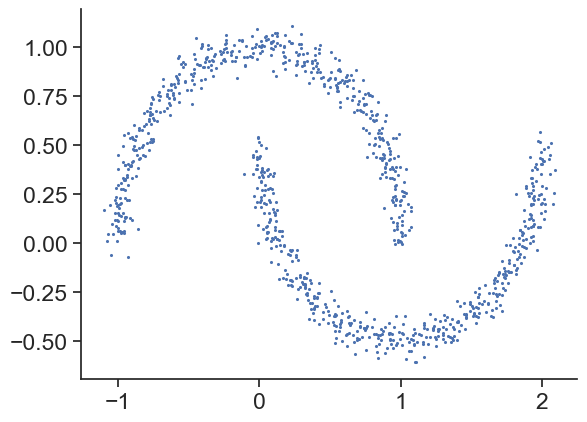

In [72]:
data, cluster_id = skl_datasets.make_moons(n_samples=1000, noise=0.05)
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0)
sbn.despine()

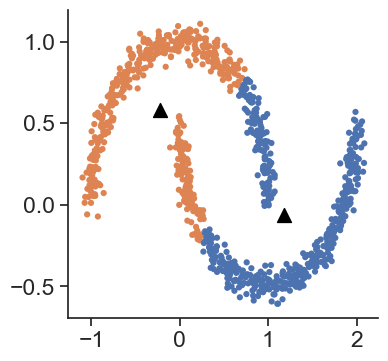

In [73]:
# 1. Initialise Kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
# 2. Fit the data
Kmean.fit(data)
# 3. Predict the clusters
clusters = Kmean.predict(data)

colours = []
for c in clusters:
    
    colours.append(sbn.color_palette()[c])

plt.figure(figsize=(4,4))
plt.scatter(data[:, 0], data[:, 1], s=20, linewidth=0, c=colours)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='black', marker='^')
sbn.despine()

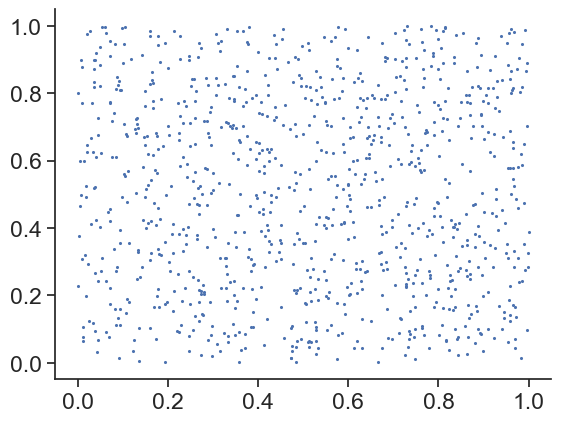

In [80]:
data = np.random.rand(1000, 2)
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0)
sbn.despine()

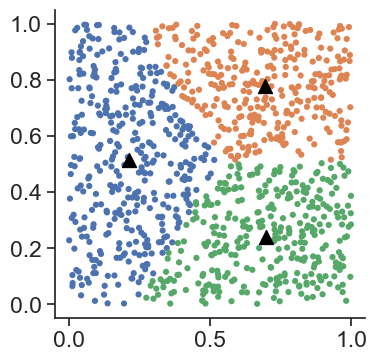

In [82]:
# 1. Initialise Kmeans
Kmean = skl_cluster.KMeans(n_clusters=3)
# 2. Fit the data
Kmean.fit(data)
# 3. Predict the clusters
clusters = Kmean.predict(data)

colours = []
for c in clusters:
    
    colours.append(sbn.color_palette()[c])

plt.figure(figsize=(4,4))
plt.scatter(data[:, 0], data[:, 1], s=20, linewidth=0, c=colours)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='black', marker='^')
sbn.despine()

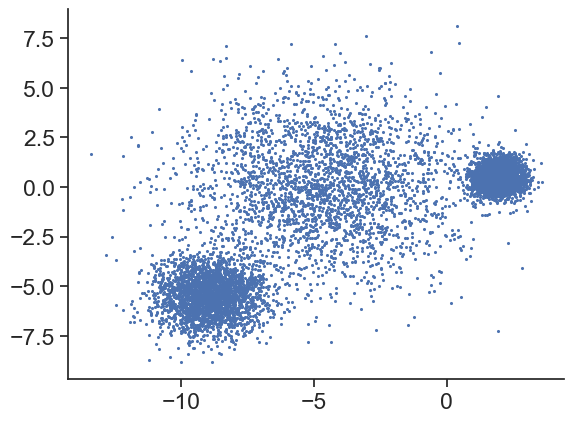

In [96]:
data, cluster_id = skl_datasets.make_blobs(
    n_samples=8000, cluster_std=[1.0, 2.5, 0.5], random_state=170
)
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0)
sbn.despine()

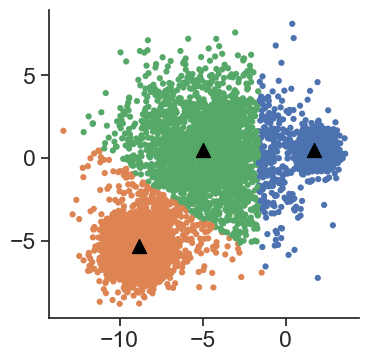

In [97]:
# 1. Initialise Kmeans
Kmean = skl_cluster.KMeans(n_clusters=3)
# 2. Fit the data
Kmean.fit(data)
# 3. Predict the clusters
clusters = Kmean.predict(data)

colours = []
for c in clusters:
    
    colours.append(sbn.color_palette()[c])

plt.figure(figsize=(4,4))
plt.scatter(data[:, 0], data[:, 1], s=20, linewidth=0, c=colours)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='black', marker='^')
sbn.despine()